<a href="https://colab.research.google.com/github/PJibin/test_poject/blob/main/yolov3_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount ('./MyDrive')

Drive already mounted at ./MyDrive; to attempt to forcibly remount, call drive.mount("./MyDrive", force_remount=True).


In [3]:
cd MyDrive/MyDrive

/content/MyDrive/MyDrive


In [4]:
import os
import sys
import cv2
import numpy as np
from glob import glob
import random
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

In [5]:
class preprocessing(object):
    def __init__(self, resize_size):
        self.resize_size = resize_size
    
    def resize(self, img):
        resize_img = cv2.resize(img, (self.resize_size, self.resize_size))
        return resize_img
    
    def normalize_img(self, img):
        norm_img = img / 255.0
        return norm_img
    
    def label_parsing(self, label_path):
        info = ET.parse(label_path)
        root = info.getroot()
        member_object = root.findall('object')
        label_data = []
        labels_dict = dict(obj_class=[], xmin=[], xmax=[], ymin=[], ymax=[])
        label_data.append(label_path)
        for obj in member_object:
            if obj.find('name').text == 'apple':
                obj_class = 0
            elif obj.find('name').text == 'banana':
                obj_class = 1
            elif obj.find('name').text == 'orange':
                obj_class = 2
            
            labels_info = obj.find('bndbox')
            xmin = int(labels_info.find('xmin').text)
            xmax = int(labels_info.find('xmax').text)
            ymin = int(labels_info.find('ymin').text)
            ymax = int(labels_info.find('ymax').text)
            labels_dict['xmin'].append(xmin)
            labels_dict['xmax'].append(xmax)
            labels_dict['ymin'].append(ymin)
            labels_dict['ymax'].append(ymax)
            labels_dict['obj_class'].append(obj_class)
            label_data.append(labels_dict)
        return label_data

In [ ]:
# datapath = './fruit/train'
# image_files = glob(os.path.join(datapath, '*.jpg'))
# label_files = glob(os.path.join(datapath, '*.xml'))
# image_files.sort(reverse=True)
# label_files.sort(reverse=True)
# prepro_img = preprocessing(resize_size=244)
    
# data = list(zip(image_files, label_files))
# random.seed(4)
# random.shuffle(data)
    
# # check the input images
# for file in data:
#     #print(file)
#     image = cv2.imread(file[0])
#     label = prepro_img.label_parsing(file[1])
        
#     resize_img = prepro_img.resize(image)
#     norm_img = prepro_img.normalize_img(resize_img)
 
#     # if (file[0].split('\\'))[-1] == 'apple_20.jpg':
#     #     rect_img = image
#     #     print(len(label[1]['obj_class']))
#     #     for i in range(len(label[1]['obj_class'])):
#     #         bb_color = (0, 0, 0)
#     #         if label[1]['obj_class'][i] == 0:
#     #             bb_color = (255, 0, 0) # blue: apple
#     #         elif label[1]['obj_class'][i] == 1:
#     #             bb_color = (0, 255, 0) # green: banana
#     #         elif label[1]['obj_class'][i] == 2:
#     #             bb_color = (0, 0, 255) # red: orange
                
#     #         rect_img = cv2.rectangle(rect_img, (label[1]['xmin'][i], label[1]['ymin'][i]), (label[1]['xmax'][i], label[1]['ymax'][i]), bb_color, 1)
#     #     cv2.imwrite('bb_result.jpg', rect_img)
     
# with open('train.txt', 'w') as f:
#     for file in data:
#         label = prepro_img.label_parsing(file[1])
#         f.write(label[0]+' ')
#         for i in range(len(label[1]['obj_class'])):
#             f.write('{} {} {} {} {}'.format(label[1]['obj_class'][i], label[1]['xmin'][i], label[1]['xmax'][i], label[1]['ymin'][i], label[1]['ymax'][i]))
#         f.write('\n')

In [6]:
import os
import glob
import csv
import xml.etree.ElementTree as ET

os.chdir(r'/content/MyDrive/MyDrive/fruit/train')
path = r'/content/MyDrive/MyDrive/fruit/train'

def xml_to_txt(path):
    txt_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        everyrow_xml_list = []
        tree = ET.parse(xml_file)
        root = tree.getroot()
        everyrow_xml_list.append(path + '/' + root.find('filename').text)
        for member in root.findall('object'):
            xmin = str(int(member[4][0].text))
            ymin = str(int(member[4][1].text))
            xmax = str(int(member[4][2].text))
            ymax = str(int(member[4][3].text))
            if xmin=="0":
                xmin="1"
            if ymin=="0":
                ymin="1"
            if xmax=="0":
                xmax="1"
            if ymax=="0":
                ymax="1"
                
            if member.find('name').text == 'apple':
              obj_class = "0"
            elif member.find('name').text == 'banana':
              obj_class = "1"
            elif member.find('name').text == 'orange':
              obj_class = "2"
            value = xmin+','+ymin+','+xmax+','+ymax+','+obj_class
            everyrow_xml_list.append(value)
        txt_list.append(everyrow_xml_list)#image_path x_min,y_min,x_max,y_max,class_id  x_min,y_min,x_max,y_max,class_id ……
    return txt_list



def main():
    image_path = path
    xml2txt_list = xml_to_txt(image_path)
    with open(r'/content/MyDrive/MyDrive/fruit/train.txt', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f,delimiter=' ')
        writer.writerows(xml2txt_list)
    print('Successfully converted xml to txt.')

if __name__ == '__main__':
    main()

Successfully converted xml to txt.


In [7]:
os.chdir(r'/content/MyDrive/MyDrive/fruit/test')
path = r'/content/MyDrive/MyDrive/fruit/test'

def xml_to_txt(path):
    txt_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        everyrow_xml_list = []
        tree = ET.parse(xml_file)
        root = tree.getroot()
        everyrow_xml_list.append(path + '/' + root.find('filename').text)
        for member in root.findall('object'):
            xmin = str(int(member[4][0].text))
            ymin = str(int(member[4][1].text))
            xmax = str(int(member[4][2].text))
            ymax = str(int(member[4][3].text))
            if xmin=="0":
                xmin="1"
            if ymin=="0":
                ymin="1"
            if xmax=="0":
                xmax="1"
            if ymax=="0":
                ymax="1"
            if member.find('name').text == 'apple':
              obj_class = "0"
            elif member.find('name').text == 'banana':
              obj_class = "1"
            elif member.find('name').text == 'orange':
              obj_class = "2"
            value = xmin+','+ymin+','+xmax+','+ymax+','+obj_class
            everyrow_xml_list.append(value)
        txt_list.append(everyrow_xml_list)#image_path x_min,y_min,x_max,y_max,class_id  x_min,y_min,x_max,y_max,class_id ……
    return txt_list



def main():
    image_path = path
    xml2txt_list = xml_to_txt(image_path)
    with open(r'/content/MyDrive/MyDrive/fruit/test.txt', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f,delimiter=' ')
        writer.writerows(xml2txt_list)
    print('Successfully converted xml to txt.')

if __name__ == '__main__':
    main()

Successfully converted xml to txt.


In [ ]:
# datapath = './fruit/test'
# image_files_test = glob(os.path.join(datapath, '*.jpg'))
# label_files_test = glob(os.path.join(datapath, '*.xml'))
# image_files_test.sort(reverse=True)
# label_files_test.sort(reverse=True)
# prepro_img = preprocessing(resize_size=244)
    
# data = list(zip(image_files_test, label_files_test))
# random.seed(4)
# random.shuffle(data)
    
# # check the input images
# for file in data:
#     #print(file)
#     image = cv2.imread(file[0])
#     label = prepro_img.label_parsing(file[1])
        
#     resize_img = prepro_img.resize(image)
#     norm_img = prepro_img.normalize_img(resize_img)
 
#     if (file[0].split('\\'))[-1] == 'mixed_8.jpg':
#         rect_img = image
#         print(len(label[1]['obj_class']))
#         for i in range(len(label[1]['obj_class'])):
#             bb_color = (0, 0, 0)
#             if label[1]['obj_class'][i] == 0:
#                 bb_color = (255, 0, 0) # blue: apple
#             elif label[1]['obj_class'][i] == 1:
#                 bb_color = (0, 255, 0) # green: banana
#             elif label[1]['obj_class'][i] == 2:
#                 bb_color = (0, 0, 255) # red: orange
                
#             rect_img = cv2.rectangle(rect_img, (label[1]['xmin'][i], label[1]['ymin'][i]), (label[1]['xmax'][i], label[1]['ymax'][i]), bb_color, 1)
#         cv2.imwrite('bb_result.jpg', rect_img)
     
# with open('test.txt', 'w') as f:
#     for file in data:
#         label = prepro_img.label_parsing(file[1])
#         f.write(label[0]+' ')
#         for i in range(len(label[1]['obj_class'])):
#             f.write('{} {} {} {} {}'.format(label[1]['obj_class'][i], label[1]['xmin'][i], label[1]['xmax'][i], label[1]['ymin'][i], label[1]['ymax'][i]))
#         f.write('\n')

In [8]:
pip install numpy==1.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
YOLO_DARKNET_WEIGHTS        = r'/content/MyDrive/MyDrive/fruit/yoloc3.weights'
YOLO_COCO_CLASSES           = r'/content/MyDrive/MyDrive/fruit/coco.names'
YOLO_STRIDES                = [8, 16, 32]
YOLO_IOU_LOSS_THRESH        = 0.5
YOLO_ANCHOR_PER_SCALE       = 3
YOLO_MAX_BBOX_PER_SCALE     = 100
YOLO_INPUT_SIZE             = 416
YOLO_ANCHORS                = [[[10,  13], [16,   30], [33,   23]],
                               [[30,  61], [62,   45], [59,  119]],
                               [[116, 90], [156, 198], [373, 326]]]
# Train options
TRAIN_CLASSES               = r'/content/MyDrive/MyDrive/fruit/fruits.names'
TRAIN_ANNOT_PATH            = r'/content/MyDrive/MyDrive/fruit/train.txt'
TRAIN_BATCH_SIZE            = 4
TRAIN_INPUT_SIZE            = 416
TRAIN_DATA_AUG              = True
TRAIN_TRANSFER              = False
TRAIN_FROM_CHECKPOINT       = False #"./checkpoints_furits/yolov3_custom"

TRAIN_LR_INIT               = 1e-4
TRAIN_LR_END                = 1e-6
TRAIN_WARMUP_EPOCHS         = 2
TRAIN_EPOCHS                = 30

# TEST options
TEST_ANNOT_PATH             = r'/content/MyDrive/MyDrive/fruit/test.txt'
TEST_BATCH_SIZE             = 4
TEST_INPUT_SIZE             = 416
TEST_DATA_AUG               = False

In [17]:
import cv2
import time
import random
import colorsys
import numpy as np
import tensorflow as tf

utils

In [18]:
def load_yolo_weights(model, weights_file):
    tf.keras.backend.clear_session() # used to reset layer names
    # load Darknet original weights to Keras model
    with open(weights_file, 'rb') as wf:
        major, minor, revision, seen, _ = np.fromfile(wf, dtype=np.int32, count=5)

        j = 0
        for i in range(75):
            if i > 0:
                conv_layer_name = 'conv2d_%d' %i
            else:
                conv_layer_name = 'conv2d'
                
            if j > 0:
                bn_layer_name = 'batch_normalization_%d' %j
            else:
                bn_layer_name = 'batch_normalization'
            
            conv_layer = model.get_layer(conv_layer_name)
            filters = conv_layer.filters
            k_size = conv_layer.kernel_size[0]
            in_dim = conv_layer.input_shape[-1]

            if i not in [58, 66, 74]:
                # darknet weights: [beta, gamma, mean, variance]
                bn_weights = np.fromfile(wf, dtype=np.float32, count=4 * filters)
                # tf weights: [gamma, beta, mean, variance]
                bn_weights = bn_weights.reshape((4, filters))[[1, 0, 2, 3]]
                bn_layer = model.get_layer(bn_layer_name)
                j += 1
            else:
                conv_bias = np.fromfile(wf, dtype=np.float32, count=filters)

            # darknet shape (out_dim, in_dim, height, width)
            conv_shape = (filters, in_dim, k_size, k_size)
            conv_weights = np.fromfile(wf, dtype=np.float32, count=np.product(conv_shape))
            # tf shape (height, width, in_dim, out_dim)
            conv_weights = conv_weights.reshape(conv_shape).transpose([2, 3, 1, 0])

            if i not in [58, 66, 74]:
                conv_layer.set_weights([conv_weights])
                bn_layer.set_weights(bn_weights)
            else:
                conv_layer.set_weights([conv_weights, conv_bias])


In [19]:
def read_class_names(class_file_name):
    # loads class name from a file
    #print(class_file_name)
    names = {}
    with open(class_file_name, 'r') as data:
        for ID, name in enumerate(data):
            names[ID] = name.strip('\n')
    return names

In [20]:
read_class_names(TRAIN_CLASSES)

{0: 'apple', 1: 'banana', 2: 'orange'}

In [21]:
def image_preprocess(image, target_size, gt_boxes=None):
    ih, iw    = target_size
    h,  w, _  = image.shape

    scale = min(iw/w, ih/h)
    nw, nh  = int(scale * w), int(scale * h)
    image_resized = cv2.resize(image, (nw, nh))

    image_paded = np.full(shape=[ih, iw, 3], fill_value=128.0)
    dw, dh = (iw - nw) // 2, (ih-nh) // 2
    image_paded[dh:nh+dh, dw:nw+dw, :] = image_resized
    image_paded = image_paded / 255.
    print(gt_boxes)
    if gt_boxes is None:
        return image_paded

    else:
        gt_boxes[:, [0, 2]] = gt_boxes[:, [0, 2]] * scale + dw
        gt_boxes[:, [1, 3]] = gt_boxes[:, [1, 3]] * scale + dh
        return image_paded, gt_boxes

In [22]:

def draw_bbox(image, bboxes, CLASSES=TRAIN_CLASSES, show_label=True, show_confidence = True, Text_colors=(255,255,0), rectangle_colors=''):   
    NUM_CLASS = read_class_names(CLASSES)
    num_classes = len(NUM_CLASS)
    image_h, image_w, _ = image.shape
    hsv_tuples = [(1.0 * x / num_classes, 1., 1.) for x in range(num_classes)]
    #print("hsv_tuples", hsv_tuples)
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))

    random.seed(0)
    random.shuffle(colors)
    random.seed(None)

    for i, bbox in enumerate(bboxes):
        coor = np.array(bbox[:4], dtype=np.int32)
        score = bbox[4]
        class_ind = int(bbox[5])
        bbox_color = rectangle_colors if rectangle_colors != ''else colors[class_ind]
        bbox_thick = int(0.6 * (image_h + image_w) / 1000)
        if bbox_thick < 1: bbox_thick = 1
        #print(image_h, image_w, bbox_thick)
        fontScale = 0.75 * bbox_thick
        (x1, y1), (x2, y2) = (coor[0], coor[1]), (coor[2], coor[3])

        # put object rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), bbox_color, bbox_thick*2)

        if show_label:
            # get text label
            score_str = f' {score:.2f}' if show_confidence else '' 
            label = f'{NUM_CLASS[class_ind]}' + score_str

            # get text size
            (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_COMPLEX_SMALL,
                                                                  fontScale, thickness=bbox_thick)
            # put filled text rectangle
            cv2.rectangle(image, (x1, y1), (x1 + text_width, y1 - text_height - baseline), bbox_color, thickness=cv2.FILLED)

            # put text above rectangle
            cv2.putText(image, label, (x1, y1-4), cv2.FONT_HERSHEY_COMPLEX_SMALL,
                        fontScale, Text_colors, bbox_thick, lineType=cv2.LINE_AA)

    return image

In [23]:
def bboxes_iou(boxes1, boxes2):
    boxes1 = np.array(boxes1)
    boxes2 = np.array(boxes2)

    boxes1_area = (boxes1[..., 2] - boxes1[..., 0]) * (boxes1[..., 3] - boxes1[..., 1])
    boxes2_area = (boxes2[..., 2] - boxes2[..., 0]) * (boxes2[..., 3] - boxes2[..., 1])

    left_up       = np.maximum(boxes1[..., :2], boxes2[..., :2])
    right_down    = np.minimum(boxes1[..., 2:], boxes2[..., 2:])

    inter_section = np.maximum(right_down - left_up, 0.0)
    inter_area    = inter_section[..., 0] * inter_section[..., 1]
    union_area    = boxes1_area + boxes2_area - inter_area
    ious          = np.maximum(1.0 * inter_area / union_area, np.finfo(float).eps)

    return ious


In [24]:

def nms(bboxes, iou_threshold, sigma=0.3):

    classes_in_img = list(set(bboxes[:, 5]))
    best_bboxes = []

    for cls in classes_in_img:
        cls_mask = (bboxes[:, 5] == cls)
        cls_bboxes = bboxes[cls_mask]
        # Process 1: Determine whether the number of bounding boxes is greater than 0 
        while len(cls_bboxes) > 0:
            # Process 2: Select the bounding box with the highest score according to socre order A
            max_ind = np.argmax(cls_bboxes[:, 4])
            best_bbox = cls_bboxes[max_ind]
            best_bboxes.append(best_bbox)
            cls_bboxes = np.concatenate([cls_bboxes[: max_ind], cls_bboxes[max_ind + 1:]])
            # Process 3: Calculate this bounding box A and
            # Remain all iou of the bounding box and remove those bounding boxes whose iou value is higher than the threshold 
            iou = bboxes_iou(best_bbox[np.newaxis, :4], cls_bboxes[:, :4])
            weight = np.ones((len(iou),), dtype=float)

            iou_mask = iou > iou_threshold
            weight[iou_mask] = 0.0

            cls_bboxes[:, 4] = cls_bboxes[:, 4] * weight
            score_mask = cls_bboxes[:, 4] > 0.
            cls_bboxes = cls_bboxes[score_mask]

    return best_bboxes

In [25]:
def postprocess_boxes(pred_bbox, original_image, input_size, score_threshold):
    valid_scale=[0, np.inf]
    pred_bbox = np.array(pred_bbox)

    pred_xywh = pred_bbox[:, 0:4]
    pred_conf = pred_bbox[:, 4]
    pred_prob = pred_bbox[:, 5:]

    # 1. (x, y, w, h) --> (xmin, ymin, xmax, ymax)
    pred_coor = np.concatenate([pred_xywh[:, :2] - pred_xywh[:, 2:] * 0.5,
                                pred_xywh[:, :2] + pred_xywh[:, 2:] * 0.5], axis=-1)
    # 2. (xmin, ymin, xmax, ymax) -> (xmin_org, ymin_org, xmax_org, ymax_org)
    org_h, org_w = original_image.shape[:2]
    resize_ratio = min(input_size / org_w, input_size / org_h)

    dw = (input_size - resize_ratio * org_w) / 2
    dh = (input_size - resize_ratio * org_h) / 2

    pred_coor[:, 0::2] = 1.0 * (pred_coor[:, 0::2] - dw) / resize_ratio
    pred_coor[:, 1::2] = 1.0 * (pred_coor[:, 1::2] - dh) / resize_ratio

    # 3. clip some boxes those are out of range
    pred_coor = np.concatenate([np.maximum(pred_coor[:, :2], [0, 0]),
                                np.minimum(pred_coor[:, 2:], [org_w - 1, org_h - 1])], axis=-1)
    invalid_mask = np.logical_or((pred_coor[:, 0] > pred_coor[:, 2]), (pred_coor[:, 1] > pred_coor[:, 3]))
    pred_coor[invalid_mask] = 0

    # 4. discard some invalid boxes
    bboxes_scale = np.sqrt(np.multiply.reduce(pred_coor[:, 2:4] - pred_coor[:, 0:2], axis=-1))
    scale_mask = np.logical_and((valid_scale[0] < bboxes_scale), (bboxes_scale < valid_scale[1]))

    # 5. discard boxes with low scores
    classes = np.argmax(pred_prob, axis=-1)
    scores = pred_conf * pred_prob[np.arange(len(pred_coor)), classes]
    score_mask = scores > score_threshold
    mask = np.logical_and(scale_mask, score_mask)
    coors, scores, classes = pred_coor[mask], scores[mask], classes[mask]
    #print(coors)

    #print(coors[0])
    return np.concatenate([coors, scores[:, np.newaxis], classes[:, np.newaxis]], axis=-1)

In [26]:
def detect_image(YoloV3, image_path, output_path, input_size=416, show=False, CLASSES=TRAIN_CLASSES, score_threshold=0.3, iou_threshold=0.45, rectangle_colors=''):
    original_image      = cv2.imread(image_path)
    original_image      = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    #original_image      = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    image_data = image_preprocess(np.copy(original_image), [input_size, input_size])
    image_data = tf.expand_dims(image_data, 0)

    pred_bbox = YoloV3.predict(image_data)
    pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
    pred_bbox = tf.concat(pred_bbox, axis=0)
    
    bboxes = postprocess_boxes(pred_bbox, original_image, input_size, score_threshold)
    #xx=np.array(bboxes)
    #print(xx.shape)

    bboxes = nms(bboxes, iou_threshold)
    image = draw_bbox(original_image, bboxes, CLASSES=CLASSES, rectangle_colors=rectangle_colors)
    #cv2.imwrite('./output.jpg', image)
        
    return image

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, LeakyReLU, ZeroPadding2D, BatchNormalization
from tensorflow.keras.regularizers import l2



STRIDES         = np.array(YOLO_STRIDES)
ANCHORS         = (np.array(YOLO_ANCHORS).T/STRIDES).T
IOU_LOSS_THRESH = YOLO_IOU_LOSS_THRESH

In [28]:
class BatchNormalization(BatchNormalization):
    # "Frozen state" and "inference mode" are two separate concepts.
    # `layer.trainable = False` is to freeze the layer, so the layer will use
    # stored moving `var` and `mean` in the "inference mode", and both `gama`
    # and `beta` will not be updated !
    def call(self, x, training=False):
        if not training:
            training = tf.constant(False)
        training = tf.logical_and(training, self.trainable)
        return super().call(x, training)

def convolutional(input_layer, filters_shape, downsample=False, activate=True, bn=True):
    if downsample:
        input_layer = ZeroPadding2D(((1, 0), (1, 0)))(input_layer)
        padding = 'valid'
        strides = 2
    else:
        strides = 1
        padding = 'same'

    conv = Conv2D(filters=filters_shape[-1], kernel_size = filters_shape[0], strides=strides,
                  padding=padding, use_bias=not bn, kernel_regularizer=l2(0.0005),
                  kernel_initializer=tf.random_normal_initializer(stddev=0.01),
                  bias_initializer=tf.constant_initializer(0.))(input_layer)
    if bn:
        conv = BatchNormalization()(conv)
    if activate == True:
        conv = LeakyReLU(alpha=0.1)(conv)

    return conv

def residual_block(input_layer, input_channel, filter_num1, filter_num2):
    short_cut = input_layer
    conv = convolutional(input_layer, filters_shape=(1, 1, input_channel, filter_num1))
    conv = convolutional(conv       , filters_shape=(3, 3, filter_num1,   filter_num2))

    residual_output = short_cut + conv
    return residual_output

def upsample(input_layer):
    return tf.image.resize(input_layer, (input_layer.shape[1] * 2, input_layer.shape[2] * 2), method='nearest')


def darknet53(input_data):
    input_data = convolutional(input_data, (3, 3,  3,  32))
    input_data = convolutional(input_data, (3, 3, 32,  64), downsample=True)

    for i in range(1):
        input_data = residual_block(input_data,  64,  32, 64)

    input_data = convolutional(input_data, (3, 3,  64, 128), downsample=True)

    for i in range(2):
        input_data = residual_block(input_data, 128,  64, 128)

    input_data = convolutional(input_data, (3, 3, 128, 256), downsample=True)

    for i in range(8):
        input_data = residual_block(input_data, 256, 128, 256)

    route_1 = input_data
    input_data = convolutional(input_data, (3, 3, 256, 512), downsample=True)

    for i in range(8):
        input_data = residual_block(input_data, 512, 256, 512)

    route_2 = input_data
    input_data = convolutional(input_data, (3, 3, 512, 1024), downsample=True)

    for i in range(4):
        input_data = residual_block(input_data, 1024, 512, 1024)

    return route_1, route_2, input_data

def YOLOv3(input_layer, NUM_CLASS):
    # After the input layer enters the Darknet-53 network, we get three branches
    route_1, route_2, conv = darknet53(input_layer)
    # See the orange module (DBL) in the figure above, a total of 5 Subconvolution operation
    conv = convolutional(conv, (1, 1, 1024,  512))
    conv = convolutional(conv, (3, 3,  512, 1024))
    conv = convolutional(conv, (1, 1, 1024,  512))
    conv = convolutional(conv, (3, 3,  512, 1024))
    conv = convolutional(conv, (1, 1, 1024,  512))
    conv_lobj_branch = convolutional(conv, (3, 3, 512, 1024))
    
    # conv_lbbox is used to predict large-sized objects , Shape = [None, 13, 13, 255] 
    conv_lbbox = convolutional(conv_lobj_branch, (1, 1, 1024, 3*(NUM_CLASS + 5)), activate=False, bn=False)

    conv = convolutional(conv, (1, 1,  512,  256))
    # upsample here uses the nearest neighbor interpolation method, which has the advantage that the
    # upsampling process does not need to learn, thereby reducing the network parameter  
    conv = upsample(conv)

    conv = tf.concat([conv, route_2], axis=-1)
    conv = convolutional(conv, (1, 1, 768, 256))
    conv = convolutional(conv, (3, 3, 256, 512))
    conv = convolutional(conv, (1, 1, 512, 256))
    conv = convolutional(conv, (3, 3, 256, 512))
    conv = convolutional(conv, (1, 1, 512, 256))
    conv_mobj_branch = convolutional(conv, (3, 3, 256, 512))

    # conv_mbbox is used to predict medium-sized objects, shape = [None, 26, 26, 255]
    conv_mbbox = convolutional(conv_mobj_branch, (1, 1, 512, 3*(NUM_CLASS + 5)), activate=False, bn=False)

    conv = convolutional(conv, (1, 1, 256, 128))
    conv = upsample(conv)

    conv = tf.concat([conv, route_1], axis=-1)
    conv = convolutional(conv, (1, 1, 384, 128))
    conv = convolutional(conv, (3, 3, 128, 256))
    conv = convolutional(conv, (1, 1, 256, 128))
    conv = convolutional(conv, (3, 3, 128, 256))
    conv = convolutional(conv, (1, 1, 256, 128))
    conv_sobj_branch = convolutional(conv, (3, 3, 128, 256))
    
    # conv_sbbox is used to predict small size objects, shape = [None, 52, 52, 255]
    conv_sbbox = convolutional(conv_sobj_branch, (1, 1, 256, 3*(NUM_CLASS +5)), activate=False, bn=False)
        
    return [conv_sbbox, conv_mbbox, conv_lbbox]

def Create_Yolov3(input_size=416, channels=3, training=False, CLASSES=TRAIN_CLASSES):
    NUM_CLASS = len(read_class_names(CLASSES))
    input_layer  = Input([input_size, input_size, channels])

    conv_tensors = YOLOv3(input_layer, NUM_CLASS)

    output_tensors = []
    for i, conv_tensor in enumerate(conv_tensors):
        pred_tensor = decode(conv_tensor, NUM_CLASS, i)
        if training: output_tensors.append(conv_tensor)
        output_tensors.append(pred_tensor)

    YoloV3 = tf.keras.Model(input_layer, output_tensors)
    return YoloV3

def decode(conv_output, NUM_CLASS, i=0):
    # where i = 0, 1 or 2 to correspond to the three grid scales  
    conv_shape       = tf.shape(conv_output)
    batch_size       = conv_shape[0]
    output_size      = conv_shape[1]

    conv_output = tf.reshape(conv_output, (batch_size, output_size, output_size, 3, 5 + NUM_CLASS))

    conv_raw_dxdy = conv_output[:, :, :, :, 0:2] # offset of center position     
    conv_raw_dwdh = conv_output[:, :, :, :, 2:4] # Prediction box length and width offset
    conv_raw_conf = conv_output[:, :, :, :, 4:5] # confidence of the prediction box
    conv_raw_prob = conv_output[:, :, :, :, 5: ] # category probability of the prediction box 

    # next need Draw the grid. Where output_size is equal to 13, 26 or 52  
    y = tf.range(output_size, dtype=tf.int32)
    y = tf.expand_dims(y, -1)
    y = tf.tile(y, [1, output_size])
    x = tf.range(output_size,dtype=tf.int32)
    x = tf.expand_dims(x, 0)
    x = tf.tile(x, [output_size, 1])

    xy_grid = tf.concat([x[:, :, tf.newaxis], y[:, :, tf.newaxis]], axis=-1)
    xy_grid = tf.tile(xy_grid[tf.newaxis, :, :, tf.newaxis, :], [batch_size, 1, 1, 3, 1])
    xy_grid = tf.cast(xy_grid, tf.float32)

    # Calculate the center position of the prediction box:
    pred_xy = (tf.sigmoid(conv_raw_dxdy) + xy_grid) * STRIDES[i]
    # Calculate the length and width of the prediction box:
    pred_wh = (tf.exp(conv_raw_dwdh) * ANCHORS[i]) * STRIDES[i]

    pred_xywh = tf.concat([pred_xy, pred_wh], axis=-1)
    pred_conf = tf.sigmoid(conv_raw_conf) # object box calculates the predicted confidence
    pred_prob = tf.sigmoid(conv_raw_prob) # calculating the predicted probability category box object

    # calculating the predicted probability category box object
    return tf.concat([pred_xywh, pred_conf, pred_prob], axis=-1)

def bbox_iou(boxes1, boxes2):
    boxes1_area = boxes1[..., 2] * boxes1[..., 3]
    boxes2_area = boxes2[..., 2] * boxes2[..., 3]

    boxes1 = tf.concat([boxes1[..., :2] - boxes1[..., 2:] * 0.5,
                        boxes1[..., :2] + boxes1[..., 2:] * 0.5], axis=-1)
    boxes2 = tf.concat([boxes2[..., :2] - boxes2[..., 2:] * 0.5,
                        boxes2[..., :2] + boxes2[..., 2:] * 0.5], axis=-1)

    left_up = tf.maximum(boxes1[..., :2], boxes2[..., :2])
    right_down = tf.minimum(boxes1[..., 2:], boxes2[..., 2:])

    inter_section = tf.maximum(right_down - left_up, 0.0)
    inter_area = inter_section[..., 0] * inter_section[..., 1]
    union_area = boxes1_area + boxes2_area - inter_area

    return 1.0 * inter_area / union_area

def bbox_giou(boxes1, boxes2):
    boxes1 = tf.concat([boxes1[..., :2] - boxes1[..., 2:] * 0.5,
                        boxes1[..., :2] + boxes1[..., 2:] * 0.5], axis=-1)
    boxes2 = tf.concat([boxes2[..., :2] - boxes2[..., 2:] * 0.5,
                        boxes2[..., :2] + boxes2[..., 2:] * 0.5], axis=-1)

    boxes1 = tf.concat([tf.minimum(boxes1[..., :2], boxes1[..., 2:]),
                        tf.maximum(boxes1[..., :2], boxes1[..., 2:])], axis=-1)
    boxes2 = tf.concat([tf.minimum(boxes2[..., :2], boxes2[..., 2:]),
                        tf.maximum(boxes2[..., :2], boxes2[..., 2:])], axis=-1)

    boxes1_area = (boxes1[..., 2] - boxes1[..., 0]) * (boxes1[..., 3] - boxes1[..., 1])
    boxes2_area = (boxes2[..., 2] - boxes2[..., 0]) * (boxes2[..., 3] - boxes2[..., 1])

    left_up = tf.maximum(boxes1[..., :2], boxes2[..., :2])
    right_down = tf.minimum(boxes1[..., 2:], boxes2[..., 2:])

    inter_section = tf.maximum(right_down - left_up, 0.0)
    inter_area = inter_section[..., 0] * inter_section[..., 1]
    union_area = boxes1_area + boxes2_area - inter_area
    iou = inter_area / union_area

    enclose_left_up = tf.minimum(boxes1[..., :2], boxes2[..., :2])
    enclose_right_down = tf.maximum(boxes1[..., 2:], boxes2[..., 2:])
    enclose = tf.maximum(enclose_right_down - enclose_left_up, 0.0)
    enclose_area = enclose[..., 0] * enclose[..., 1]
    giou = iou - 1.0 * (enclose_area - union_area) / enclose_area

    return giou


def compute_loss(pred, conv, label, bboxes, i=0, CLASSES=TRAIN_CLASSES):
    NUM_CLASS = len(read_class_names(CLASSES))
    conv_shape  = tf.shape(conv)
    batch_size  = conv_shape[0]
    output_size = conv_shape[1]
    input_size  = STRIDES[i] * output_size
    conv = tf.reshape(conv, (batch_size, output_size, output_size, 3, 5 + NUM_CLASS))

    conv_raw_conf = conv[:, :, :, :, 4:5]
    conv_raw_prob = conv[:, :, :, :, 5:]

    pred_xywh     = pred[:, :, :, :, 0:4]
    pred_conf     = pred[:, :, :, :, 4:5]

    label_xywh    = label[:, :, :, :, 0:4]
    respond_bbox  = label[:, :, :, :, 4:5]
    label_prob    = label[:, :, :, :, 5:]

    giou = tf.expand_dims(bbox_giou(pred_xywh, label_xywh), axis=-1)
    input_size = tf.cast(input_size, tf.float32)

    bbox_loss_scale = 2.0 - 1.0 * label_xywh[:, :, :, :, 2:3] * label_xywh[:, :, :, :, 3:4] / (input_size ** 2)
    giou_loss = respond_bbox * bbox_loss_scale * (1- giou)

    iou = bbox_iou(pred_xywh[:, :, :, :, np.newaxis, :], bboxes[:, np.newaxis, np.newaxis, np.newaxis, :, :])
    max_iou = tf.expand_dims(tf.reduce_max(iou, axis=-1), axis=-1)

    respond_bgd = (1.0 - respond_bbox) * tf.cast( max_iou < IOU_LOSS_THRESH, tf.float32)

    conf_focal = tf.pow(respond_bbox - pred_conf, 2)

    conf_loss = conf_focal * (
            respond_bbox * tf.nn.sigmoid_cross_entropy_with_logits(labels=respond_bbox, logits=conv_raw_conf)
            +
            respond_bgd * tf.nn.sigmoid_cross_entropy_with_logits(labels=respond_bbox, logits=conv_raw_conf)
    )

    prob_loss = respond_bbox * tf.nn.sigmoid_cross_entropy_with_logits(labels=label_prob, logits=conv_raw_prob)

    giou_loss = tf.reduce_mean(tf.reduce_sum(giou_loss, axis=[1,2,3,4]))
    conf_loss = tf.reduce_mean(tf.reduce_sum(conf_loss, axis=[1,2,3,4]))
    prob_loss = tf.reduce_mean(tf.reduce_sum(prob_loss, axis=[1,2,3,4]))

    return giou_loss, conf_loss, prob_loss

In [29]:

import os
import cv2
import random
import numpy as np
import tensorflow as tf



class Dataset(object):
    # Dataset preprocess implementation
    def __init__(self, dataset_type):
        self.annot_path  = TRAIN_ANNOT_PATH if dataset_type == 'train' else TEST_ANNOT_PATH
        self.input_sizes = TRAIN_INPUT_SIZE if dataset_type == 'train' else TEST_INPUT_SIZE
        self.batch_size  = TRAIN_BATCH_SIZE if dataset_type == 'train' else TEST_BATCH_SIZE
        self.data_aug    = TRAIN_DATA_AUG   if dataset_type == 'train' else TEST_DATA_AUG

        self.train_input_sizes = TRAIN_INPUT_SIZE
        self.strides = np.array(YOLO_STRIDES)
        self.classes = read_class_names(TRAIN_CLASSES)
        self.num_classes = len(self.classes)
        self.anchors = (np.array(YOLO_ANCHORS).T/self.strides).T
        self.anchor_per_scale = YOLO_ANCHOR_PER_SCALE
        self.max_bbox_per_scale = YOLO_MAX_BBOX_PER_SCALE

        self.annotations = self.load_annotations(dataset_type)
        self.num_samples = len(self.annotations)
        self.num_batchs = int(np.ceil(self.num_samples / self.batch_size))
        self.batch_count = 0


    def load_annotations(self, dataset_type):
        final_annotations = []
        with open(self.annot_path, 'r') as f:
            txt = f.readlines()
            annotations = [line.strip() for line in txt if len(line.strip().split()[1:]) != 0]
        np.random.shuffle(annotations)
        
        for annotation in annotations:
            # fully parse annotations
            line = annotation.split()
            image_path, index = "", 1
            for i, one_line in enumerate(line):
                if not one_line.replace(",","").isnumeric():
                    if image_path != "": image_path += " "
                    image_path += one_line
                else:
                    index = i
                    break
            if not os.path.exists(image_path):
                raise KeyError("%s does not exist ... " %image_path)

            final_annotations.append([image_path, line[index:]])

        return final_annotations

    def __iter__(self):
        return self

    def __next__(self):
        with tf.device('/cpu:0'):
            self.train_input_size = random.choice([self.train_input_sizes])
            self.train_output_sizes = self.train_input_size // self.strides

            batch_image = np.zeros((self.batch_size, self.train_input_size, self.train_input_size, 3), dtype=np.float32)

            batch_label_sbbox = np.zeros((self.batch_size, self.train_output_sizes[0], self.train_output_sizes[0],
                                          self.anchor_per_scale, 5 + self.num_classes), dtype=np.float32)
            batch_label_mbbox = np.zeros((self.batch_size, self.train_output_sizes[1], self.train_output_sizes[1],
                                          self.anchor_per_scale, 5 + self.num_classes), dtype=np.float32)
            batch_label_lbbox = np.zeros((self.batch_size, self.train_output_sizes[2], self.train_output_sizes[2],
                                          self.anchor_per_scale, 5 + self.num_classes), dtype=np.float32)

            batch_sbboxes = np.zeros((self.batch_size, self.max_bbox_per_scale, 4), dtype=np.float32)
            batch_mbboxes = np.zeros((self.batch_size, self.max_bbox_per_scale, 4), dtype=np.float32)
            batch_lbboxes = np.zeros((self.batch_size, self.max_bbox_per_scale, 4), dtype=np.float32)

            num = 0
            if self.batch_count < self.num_batchs:
                while num < self.batch_size:
                    index = self.batch_count * self.batch_size + num
                    if index >= self.num_samples: index -= self.num_samples
                    annotation = self.annotations[index]
                    image, bboxes = self.parse_annotation(annotation)
                    label_sbbox, label_mbbox, label_lbbox, sbboxes, mbboxes, lbboxes = self.preprocess_true_boxes(bboxes)

                    batch_image[num, :, :, :] = image
                    batch_label_sbbox[num, :, :, :, :] = label_sbbox
                    batch_label_mbbox[num, :, :, :, :] = label_mbbox
                    batch_label_lbbox[num, :, :, :, :] = label_lbbox
                    batch_sbboxes[num, :, :] = sbboxes
                    batch_mbboxes[num, :, :] = mbboxes
                    batch_lbboxes[num, :, :] = lbboxes
                    num += 1
                self.batch_count += 1
                batch_smaller_target = batch_label_sbbox, batch_sbboxes
                batch_medium_target  = batch_label_mbbox, batch_mbboxes
                batch_larger_target  = batch_label_lbbox, batch_lbboxes

                return batch_image, (batch_smaller_target, batch_medium_target, batch_larger_target)
            else:
                self.batch_count = 0
                np.random.shuffle(self.annotations)
                raise StopIteration

    def random_horizontal_flip(self, image, bboxes):
        if random.random() < 0.5:
            _, w, _ = image.shape
            image = image[:, ::-1, :]
            bboxes[:, [0,2]] = w - bboxes[:, [2,0]]

        return image, bboxes

    def random_crop(self, image, bboxes):
        if random.random() < 0.5:
            h, w, _ = image.shape
            max_bbox = np.concatenate([np.min(bboxes[:, 0:2], axis=0), np.max(bboxes[:, 2:4], axis=0)], axis=-1)

            max_l_trans = max_bbox[0]
            max_u_trans = max_bbox[1]
            max_r_trans = w - max_bbox[2]
            max_d_trans = h - max_bbox[3]

            crop_xmin = max(0, int(max_bbox[0] - random.uniform(0, max_l_trans)))
            crop_ymin = max(0, int(max_bbox[1] - random.uniform(0, max_u_trans)))
            crop_xmax = max(w, int(max_bbox[2] + random.uniform(0, max_r_trans)))
            crop_ymax = max(h, int(max_bbox[3] + random.uniform(0, max_d_trans)))

            image = image[crop_ymin : crop_ymax, crop_xmin : crop_xmax]

            bboxes[:, [0, 2]] = bboxes[:, [0, 2]] - crop_xmin
            bboxes[:, [1, 3]] = bboxes[:, [1, 3]] - crop_ymin

        return image, bboxes

    def random_translate(self, image, bboxes):
        if random.random() < 0.5:
            h, w, _ = image.shape
            max_bbox = np.concatenate([np.min(bboxes[:, 0:2], axis=0), np.max(bboxes[:, 2:4], axis=0)], axis=-1)

            max_l_trans = max_bbox[0]
            max_u_trans = max_bbox[1]
            max_r_trans = w - max_bbox[2]
            max_d_trans = h - max_bbox[3]

            tx = random.uniform(-(max_l_trans - 1), (max_r_trans - 1))
            ty = random.uniform(-(max_u_trans - 1), (max_d_trans - 1))

            M = np.array([[1, 0, tx], [0, 1, ty]])
            image = cv2.warpAffine(image, M, (w, h))

            bboxes[:, [0, 2]] = bboxes[:, [0, 2]] + tx
            bboxes[:, [1, 3]] = bboxes[:, [1, 3]] + ty

        return image, bboxes

    def parse_annotation(self, annotation):

        image_path = annotation[0]
        image = cv2.imread(image_path)
            
        bboxes = np.array([list(map(int, box.split(','))) for box in annotation[1]])

        if self.data_aug:
            image, bboxes = self.random_horizontal_flip(np.copy(image), np.copy(bboxes))
            image, bboxes = self.random_crop(np.copy(image), np.copy(bboxes))
            image, bboxes = self.random_translate(np.copy(image), np.copy(bboxes))

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image, bboxes = image_preprocess(np.copy(image), [self.train_input_size, self.train_input_size], np.copy(bboxes))
        return image, bboxes

    def preprocess_true_boxes(self, bboxes):
        label = [np.zeros((self.train_output_sizes[i], self.train_output_sizes[i], self.anchor_per_scale,
                           5 + self.num_classes)) for i in range(3)]
        bboxes_xywh = [np.zeros((self.max_bbox_per_scale, 4)) for _ in range(3)]
        bbox_count = np.zeros((3,))

        for bbox in bboxes:
            bbox_coor = bbox[:4]
            bbox_class_ind = bbox[4]

            onehot = np.zeros(self.num_classes, dtype=np.float64)
            onehot[bbox_class_ind] = 1.0
            uniform_distribution = np.full(self.num_classes, 1.0 / self.num_classes)
            deta = 0.01
            smooth_onehot = onehot * (1 - deta) + deta * uniform_distribution

            bbox_xywh = np.concatenate([(bbox_coor[2:] + bbox_coor[:2]) * 0.5, bbox_coor[2:] - bbox_coor[:2]], axis=-1)
            bbox_xywh_scaled = 1.0 * bbox_xywh[np.newaxis, :] / self.strides[:, np.newaxis]

            iou = []
            exist_positive = False
            for i in range(3):
                anchors_xywh = np.zeros((self.anchor_per_scale, 4))
                anchors_xywh[:, 0:2] = np.floor(bbox_xywh_scaled[i, 0:2]).astype(np.int32) + 0.5
                anchors_xywh[:, 2:4] = self.anchors[i]

                iou_scale = bbox_iou(bbox_xywh_scaled[i][np.newaxis, :], anchors_xywh)
                iou.append(iou_scale)
                iou_mask = iou_scale > 0.3

                if np.any(iou_mask):
                    xind, yind = np.floor(bbox_xywh_scaled[i, 0:2]).astype(np.int32)

                    label[i][yind, xind, iou_mask, :] = 0
                    label[i][yind, xind, iou_mask, 0:4] = bbox_xywh
                    label[i][yind, xind, iou_mask, 4:5] = 1.0
                    label[i][yind, xind, iou_mask, 5:] = smooth_onehot

                    bbox_ind = int(bbox_count[i] % self.max_bbox_per_scale)
                    bboxes_xywh[i][bbox_ind, :4] = bbox_xywh
                    bbox_count[i] += 1

                    exist_positive = True

            if not exist_positive:
                best_anchor_ind = np.argmax(np.array(iou).reshape(-1), axis=-1)
                best_detect = int(best_anchor_ind / self.anchor_per_scale)
                best_anchor = int(best_anchor_ind % self.anchor_per_scale)
                xind, yind = np.floor(bbox_xywh_scaled[best_detect, 0:2]).astype(np.int32)

                label[best_detect][yind, xind, best_anchor, :] = 0
                label[best_detect][yind, xind, best_anchor, 0:4] = bbox_xywh
                label[best_detect][yind, xind, best_anchor, 4:5] = 1.0
                label[best_detect][yind, xind, best_anchor, 5:] = smooth_onehot
                
                bbox_ind = int(bbox_count[best_detect] % self.max_bbox_per_scale)
                bboxes_xywh[best_detect][bbox_ind, :4] = bbox_xywh
                bbox_count[best_detect] += 1

        label_sbbox, label_mbbox, label_lbbox = label
        sbboxes, mbboxes, lbboxes = bboxes_xywh
        return label_sbbox, label_mbbox, label_lbbox, sbboxes, mbboxes, lbboxes

    def __len__(self):
        return self.num_batchs


In [30]:
trainset = Dataset('train')
steps_per_epoch = len(trainset)

steps_per_epoch

60

In [31]:


import os
import shutil
import numpy as np
import tensorflow as tf

global TRAIN_FROM_CHECKPOINT
input_size = YOLO_INPUT_SIZE
Darknet_weights = YOLO_DARKNET_WEIGHTS


save_best_only = True # saves only best model according validation loss
save_checkpoints = False # saves all best validated checkpoints in training process (may require a lot disk space)


trainset = Dataset('train')
testset = Dataset('test')

steps_per_epoch = len(trainset)
global_steps = tf.Variable(1, trainable=False, dtype=tf.int64)
warmup_steps = TRAIN_WARMUP_EPOCHS * steps_per_epoch
total_steps = TRAIN_EPOCHS * steps_per_epoch

if TRAIN_TRANSFER:
    Darknet = Create_Yolov3(input_size=input_size)
    load_yolo_weights(Darknet, Darknet_weights) # use darknet weights

yolo = Create_Yolov3(input_size=input_size, training=True, CLASSES=TRAIN_CLASSES)

#TRAIN_FROM_CHECKPOINT = False
if TRAIN_FROM_CHECKPOINT:
    yolo.load_weights(TRAIN_FROM_CHECKPOINT)

## transfer && Not use checkpoint
if TRAIN_TRANSFER and not TRAIN_FROM_CHECKPOINT:
    for i, l in enumerate(Darknet.layers):
        layer_weights = l.get_weights()
        if layer_weights != []:
            try:
                yolo.layers[i].set_weights(layer_weights)
            except:
                print("skipping", yolo.layers[i].name)

optimizer = tf.keras.optimizers.Adam()

def train_step(image_data, target):
    with tf.GradientTape() as tape:
        pred_result = yolo(image_data, training=True)
        giou_loss=conf_loss=prob_loss=0
        # optimizing process
        for i in range(3):
            conv, pred = pred_result[i*2], pred_result[i*2+1]
            loss_items = compute_loss(pred, conv, *target[i], i, CLASSES=TRAIN_CLASSES)
            giou_loss += loss_items[0]
            conf_loss += loss_items[1]
            prob_loss += loss_items[2]
        total_loss = giou_loss + conf_loss + prob_loss
        gradients = tape.gradient(total_loss, yolo.trainable_variables)
        optimizer.apply_gradients(zip(gradients, yolo.trainable_variables))


        # update learning rate
        global_steps.assign_add(1)
        if global_steps < warmup_steps:# and not TRAIN_TRANSFER:
            lr = global_steps / warmup_steps * TRAIN_LR_INIT
        else:
            lr = TRAIN_LR_END + 0.5 * (TRAIN_LR_INIT - TRAIN_LR_END)*(
                (1 + tf.cos((global_steps - warmup_steps) / (total_steps - warmup_steps) * np.pi)))
        optimizer.lr.assign(lr.numpy())

    return global_steps.numpy(), optimizer.lr.numpy(), giou_loss.numpy(), conf_loss.numpy(), prob_loss.numpy(), total_loss.numpy()



def validate_step(image_data, target):
    with tf.GradientTape() as tape:
        pred_result = yolo(image_data, training=False)
        giou_loss=conf_loss=prob_loss=0

        # optimizing process
        for i in range(3):
            conv, pred = pred_result[i*2], pred_result[i*2+1]
            loss_items = compute_loss(pred, conv, *target[i], i, CLASSES=TRAIN_CLASSES)
            giou_loss += loss_items[0]
            conf_loss += loss_items[1]
            prob_loss += loss_items[2]

        total_loss = 0.02*giou_loss + 0.02*conf_loss + prob_loss
        
    return giou_loss.numpy(), conf_loss.numpy(), prob_loss.numpy(), total_loss.numpy()


best_val_loss = 1000 # should be large at start


for epoch in range(TRAIN_EPOCHS):
    for image_data, target in trainset:
        results = train_step(image_data, target)
        cur_step = results[0]%steps_per_epoch
        print("epoch:{:2.0f} step:{:5.0f}/{}, lr:{:.6f}, giou_loss:{:7.2f}, conf_loss:{:7.2f}, prob_loss:{:7.2f}, total_loss:{:7.2f}"
                  .format(epoch, cur_step, steps_per_epoch, results[1], results[2], results[3], results[4], results[5]))
        
    count, giou_val, conf_val, prob_val, total_val = 0., 0, 0, 0, 0
    for image_data, target in testset:
        results = validate_step(image_data, target)
        count += 1
        giou_val += results[0]
        conf_val += results[1]
        prob_val += results[2]
        total_val += results[3]

        
    print("\n\ngiou_val_loss:{:7.2f}, conf_val_loss:{:7.2f}, prob_val_loss:{:7.2f}, total_val_loss:{:7.2f}\n\n".
          format(giou_val/count, conf_val/count, prob_val/count, total_val/count))

    if save_best_only and best_val_loss > total_val/count: 
        # yolo.save_weights("./chkpt_fruits/yolov3_custom")
        yolo.save_weights("./yolov3_custom")
        best_val_loss = total_val/count



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [265   1 400 105   0]
 [354  46 475 162   0]
 [258 104 372 211   0]]
[[  2  93 407 435   1]]
epoch:22 step:   20/60, lr:0.000018, giou_loss:   3.37, conf_loss:  13.01, prob_loss:   2.76, total_loss:  19.15
[[ 24  11 211 213   2]]
[[337  26 649 314   2]
 [ 69 178 894 374   1]
 [ 79 297 922 505   1]]
[[ 29  20 258 244   2]]
[[ 15 216 191 405   0]]
epoch:22 step:   21/60, lr:0.000018, giou_loss:   1.37, conf_loss:   8.77, prob_loss:   1.68, total_loss:  11.82
[[ 17  69 143 209   0]]
[[263   1 650 194   1]
 [ 30  73 179 235   1]
 [117 120 659 309   1]]
[[ 74  83 243 191   1]]
[[ 795  369 1173  780    2]
 [ 147   48  869  476    1]
 [ 169  180  839  798    1]]
epoch:22 step:   22/60, lr:0.000018, giou_loss:   2.23, conf_loss:  11.67, prob_loss:   1.15, total_loss:  15.05
[[ 37  25 400 514   1]]
[[ 36  38 271 282   0]]
[[141  15 539 430   0]]
[[ 120  284  974 1162    0]]
epoch:22 step:   23/60, lr:0.000018, giou_loss:   0.65, conf_loss:   8.97, prob_loss:

In [32]:
best_val_loss

2.7431295096874235

In [65]:
import random
from glob import glob


datapath = r'/content/MyDrive/MyDrive/fruit/test'
img_list = glob(os.path.join(datapath, '*.jpg'))
print(len(img_list))

60


None


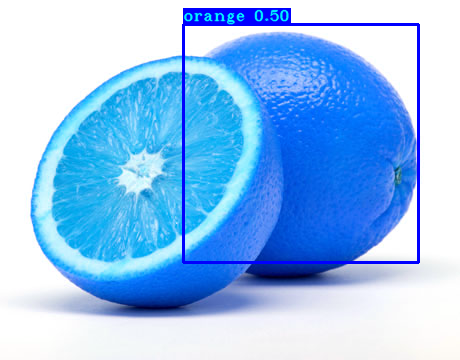

None


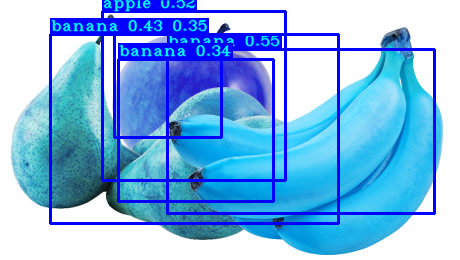

In [71]:

import os
import cv2
import numpy as np
import random
import time
import tensorflow as tf
import random
from google.colab.patches import cv2_imshow


YOLO_INPUT_SIZE = 416
input_size=YOLO_INPUT_SIZE

for x in range(2):
  a = random.randrange(0, 59)

  # image_path ="./fruit/test/banana_77.jpg" #image_info[0]
  #image_path = img_list[a]



  yolo = Create_Yolov3(input_size=input_size, CLASSES=TRAIN_CLASSES)
  # yolo.load_weights("./checkpoints/yolov3_custom")
  yolo.load_weights("./yolov3_custom")





  img = detect_image(yolo, img_list[a], "", input_size=input_size, show=True, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
  cv2_imshow(img)
    

In [36]:
image_path

'/content/MyDrive/MyDrive/fruit/test/mixed_22.jpg'